# SIMPLE SINGLE IRS SIMULATION

User positions:
 [[-112.87962717    9.84928087]
 [-223.98438825 -302.53288755]
 [-268.89900281 -102.81258583]
 [ 344.06312023  242.58394611]
 [-291.52663451  286.32838215]
 [-154.66888951 -198.32146909]
 [ 373.20788818   14.90628686]
 [-268.50403837  101.17003468]
 [ 379.57776324 -167.01779238]
 [ 430.04023447 -115.34882685]
 [ 309.48522027 -362.58002681]
 [  86.2890459  -473.75034275]
 [-227.56905382 -327.23536893]
 [-173.17214582 -401.63282036]
 [ 152.60813548   14.05786829]
 [ 239.91499204  194.93978362]
 [ 251.02478763 -385.80980393]
 [ 226.12361488  418.58153097]
 [ 128.237039     59.53943937]
 [-331.94152354  -36.10803058]
 [-346.88307387 -124.75733317]
 [ 250.6753298   -44.02037578]
 [ 298.98196561   33.73389672]
 [ -78.35161227 -367.86752082]
 [ 119.91507772    8.4539215 ]
 [ -28.16899462 -182.92035526]
 [ 380.48592009 -192.09074245]
 [-271.59177927  289.37486789]
 [  -8.23732234 -189.21412764]
 [-333.9367258   249.83702155]
 [  72.23111912   -2.07797298]
 [ 145.05176162   19.4

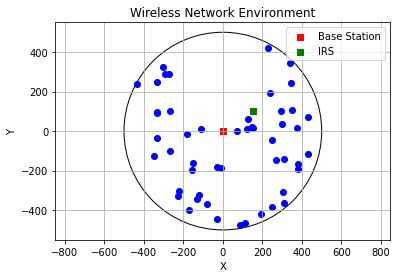

Link Budget: 
[-35.93147449 -47.62147226 -41.85956738 -47.62394694 -52.14769399
 -46.0609587  -40.08548097 -46.95080505 -45.28595934 -48.38100644
 -46.05388392 -33.69090412 -46.85664976 -52.46053549 -32.21903624
 -27.34768267 -43.89681054 -48.5900583  -29.34214132 -51.68950458
 -49.06416135 -46.40738892 -26.37193869 -46.76507073 -35.40982983
 -39.63265325 -45.28247337 -42.09081889 -39.0853532  -46.24182761
 -27.36415971 -29.48931054 -50.69579282 -43.89978244 -51.35569946
 -40.42215978 -43.08346913 -48.81542588 -45.02052737 -46.80932669
 -45.85671949 -46.85466493 -45.68729303 -40.55234162 -37.40283936
 -45.72409294 -38.95075005 -43.17117967 -35.93597399 -46.81736988]
(1, 50)

SNR of all users (in dB): 
[ 97.06852551  85.37852774  91.14043262  85.37605306  80.85230601
  86.9390413   92.91451903  86.04919495  87.71404066  84.61899356
  86.94611608  99.30909588  86.14335024  80.53946451 100.78096376
 105.65231733  89.10318946  84.4099417  103.65785868  81.31049542
  83.93583865  86.5926110

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import cmath
import random

from Functions import *

# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 50
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 30

IRS_POSITION = (150,100)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# threshold_min = 11.5
# threshold_max = 28.5

# Generate user positions
user_positions = generate_user_positions(NUM_USERS_NEW, GRID_RADIUS)
print('User positions:'"\n", user_positions)
print()

# Generate base station positions
base_station_position = generate_station_positions(BASE_STATION_POSITION)

# Generate IRS
irs_position = generate_IRS(IRS_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

# Compute the distances from each user to the IRS
d_rm = compute_distances(user_positions, irs_position)
d_rm = d_rm.reshape(1,NUM_USERS_NEW)
print('d_rm:'"\n", d_rm)
print(np.shape(d_rm)) 
print()

# Compute the distances from base_station to the IRS
d_i = compute_distances(base_station_position, irs_position)
d_i = d_i.reshape(-1, 1)
print('d_i:'"\n", d_i)
print(np.shape(d_i)) 
print()

# Generate the Rayleigh Fading Channel for each user
h_m = generate_rayleigh_fading_channel(NUM_USERS_NEW, FADING_STD_MEAN, FADING_STD_DEV)
h_m = h_m.reshape(1,-1)
print('h_m:'"\n", h_m)
print(np.shape(h_m))    
print()

f_m = []
fading = []
for user in range(NUM_USERS_NEW):
    fading.append(generate_nakagami_samples(m, omega, N))
f_m = np.array(fading)
print('f_m:'"\n",f_m) 
print(np.shape(f_m))   
print()

f_m_transpose = np.transpose(f_m)
print('f_m_transpose:'"\n",f_m_transpose) 
print(np.shape(f_m_transpose))  
print()

# Generate the Nakagami Channel from base_station to the IRS (g)
g = generate_nakagami_samples(m, omega, N)
g = g.reshape(N,1)
print('g:'"\n", g) 
print(np.shape(g)) 
print()

# Initialize an empty list to store the results for each column
results_list = []

# Loop over each column index
for column_index in range(NUM_USERS_NEW):
    # Extract the single column from f_m_transpose using indexing and transpose
    single_column = f_m_transpose[:, column_index]
    single_column = single_column.reshape(1, N)  # Reshape to (1, N)

    # Perform element-wise multiplication of the single row with g
    result = np.dot(single_column, g)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.squeeze(results_list)
results_array = results_array.reshape(1,NUM_USERS_NEW)
# print()
# print('Results array:', results_array)
# print('Shape of results array:', results_array.shape) 

# Determine the angle associated with each complex number in radians
angles_radians = np.angle(results_array)
print('Phases of results array:'"\n", angles_radians) 
print()
print('Phases of nullifying array:'"\n", -1*angles_radians) 
print()

# Compute the array that will nullify the angle/phase to give us the scalar value
r = 1
exp_results = r * np.exp(1j *-1*angles_radians)

# Print the polar form of the complex numbers
for i in range(len(exp_results)):
    print(f"Nullifying array output: \n{exp_results[i]}")

# Compute the product that will nullify the angle/phase to give us the scalar value
product = exp_results * results_array
product_numerator = product.real
print()
print('Product : '"\n", product)
print('Product numerator: '"\n", product_numerator)
print(np.shape(product_numerator)) 

link_inter = []

for i in range(NUM_USERS_NEW):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][i])/(d_m[0][i])**PATH_LOSS_EXPONENT + (product_numerator[0][i])/((d_rm[0][i])**BETA * (d_i)**BETA)))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(link_inter)
link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10(link_inter_array) + 30 
link_budget = link_budget.reshape(1,NUM_USERS_NEW)

#Calculate the noise value
noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(NUM_USERS_NEW):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)

# Calculate rate 
rate_matrix = compute_rate(SNR_matrix)

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(NUM_USERS_NEW, rate_matrix.flatten(), RATE_THRESHOLD)
# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Print link budget values
print('Link Budget: ') 
for element in link_budget:
    print(element)
print(np.shape(link_budget)) 
print() 

# Print SNR values
print('SNR of all users (in dB): ')
for element in SNR_matrix:
    print(element)
print(np.shape(SNR_matrix)) 
print() 

# Print rate values
print('Rate of all users (in bps/Hz): ')
for element in rate_matrix:
    print(element)
print(np.shape(rate_matrix)) 

print()
print('Outage probability for the simulated environment: '"{:.3f}".format(outage_probability))

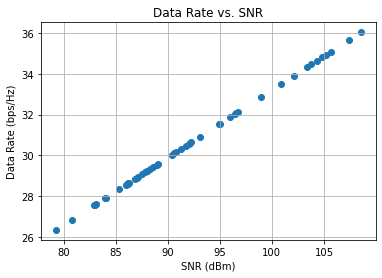

In [3]:
plt.scatter(SNR_matrix, rate_matrix)
plt.xlabel('SNR (dBm)')
plt.ylabel('Data Rate (bps/Hz)')
plt.title('Data Rate vs. SNR')
plt.grid(True)
plt.show()

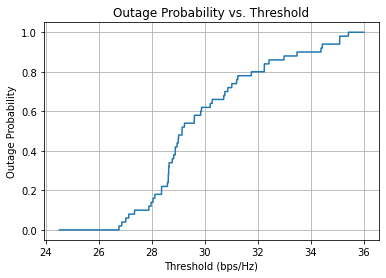

In [5]:
# Assuming you have an array 'threshold' containing the threshold values
threshold = np.arange(24.5,36, 0.001)

outage_probability = np.zeros(len(threshold))

# Calculating the outage probability for each threshold
for i in range(len(threshold)):
    outage_probability[i] = np.mean(rate_matrix.flatten() <= threshold[i])

# Plotting the outage probability vs. threshold
plt.plot(threshold, outage_probability)
plt.xlabel('Threshold (bps/Hz)')
plt.ylabel('Outage Probability')
plt.title('Outage Probability vs. Threshold')
plt.grid(True)
plt.show()

# BASIC SETUP FOR 100 SIMULATIONS FOR SINGLE CELL (WITH & WITHOUT IRS)

d_m:
 [[287.95543549  70.81712629 400.88143421 132.4597721  188.51545028
  320.48734876 427.10069349 244.68002149 252.11674253 111.98605978
  216.38937785 157.1866283  465.78200851 351.85975028 458.9589786
  373.23299405 423.8576687  320.04300515 323.24093409 447.46660673
  374.58733213 368.0644303  161.23861505 364.78282566 197.88254242
  335.67893652 421.56712771 462.67435515 347.48646869 444.42245589]]
(1, 30)

d_rm:
 [[295.45852724  50.69922809 427.64102956 156.74077036 184.05977208
  334.32071904 451.16864379 256.39521593 244.66804081 128.81588952
  198.79709537 133.12380976 467.25898912 335.87534694 433.64743509
  355.19193883 409.95159227 323.4271597  295.19408367 422.47252122
  376.07984105 385.51057841 137.53463552 392.29093828 225.48593896
  353.56665337 427.49618953 483.03345987 340.0661226  470.15415508]]
(1, 30)

d_i:
 [[28.28427125]]
(1, 1)



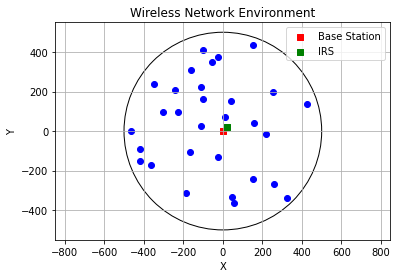

In [6]:
# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 30
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 30

IRS_POSITION = (20,20)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# threshold_min = 11.5
# threshold_max = 28.5

# Generate user positions
user_positions = generate_user_positions(NUM_USERS_NEW, GRID_RADIUS)

# Generate base station positions
base_station_position = generate_station_positions(BASE_STATION_POSITION)

# Generate IRS
irs_position = generate_IRS(IRS_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

# Compute the distances from each user to the IRS
d_rm = compute_distances(user_positions, irs_position)
d_rm = d_rm.reshape(1,NUM_USERS_NEW)
print('d_rm:'"\n", d_rm)
print(np.shape(d_rm)) 
print()

# Compute the distances from base_station to the IRS
d_i = compute_distances(base_station_position, irs_position)
d_i = d_i.reshape(-1, 1)
print('d_i:'"\n", d_i)
print(np.shape(d_i)) 
print()

# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# 100 SIMULATIONS FOR SINGLE CELL (W/O IRS)

In [19]:
NUM_SIMULATIONS = 50

# Initialize list to store individual outage probabilities
outage_probabilities_1 = []

# Perform simulations
for i in range(NUM_SIMULATIONS):
    
    # Generate the Rayleigh Fading Channel for each user to the base station
    rayleigh_channel = generate_rayleigh_fading_channel(NUM_USERS_NEW, FADING_STD_MEAN, FADING_STD_DEV)
    
    # Calculate link budget
    link_budget_1 = calc_link_budget(rayleigh_channel, d_m.flatten(), PATH_LOSS_EXPONENT, TRANSMIT_POWER_WATTS)
    
    # Calculate SNR
    SNR_1 = compute_SNR(link_budget_1, noise)

    # Calculate rate 
    rate = compute_rate(SNR_1)
    
    # Compute outage probability at each iteration
    outage_probability_1 = compute_outage_probability(NUM_USERS_NEW, rate, RATE_THRESHOLD)
    outage_probabilities_1.append(outage_probability_1)
    
# Compute average outage probability
average_outage_probability_1 = compute_average_outage_probability(outage_probabilities_1)
print()
print('Average Outage Probability (Only BS): ', "{:.3f}".format(average_outage_probability_1))


Average Outage Probability (Only BS):  0.665


# 100 SIMULATIONS FOR SINGLE CELL (WITH IRS)

In [20]:
# Initialize list to store individual outage probabilities
outage_probabilities_2 = []

#Performing for IRS
h_m = np.array(rayleigh_channel)
h_m = h_m.reshape(1,-1)

# Perform simulations
for i in range(NUM_SIMULATIONS):
    # Generate the Nakagami Channel from each user to the IRS (f_m)
    f_m = []
    fading = []
    for user in range(NUM_USERS_NEW):
        fading.append(generate_nakagami_samples(m, omega, N))
    f_m = np.array(fading)
    
    f_m_transpose = np.transpose(f_m)
    # Generate the Nakagami Channel from base_station to the IRS (g)
    g = generate_nakagami_samples(m, omega, N)
    g = g.reshape(N,1)
    
    # Initialize an empty list to store the results for each column
    results_list = []
    
    # Loop over each column index
    for column_index in range(NUM_USERS_NEW):
        
        # Extract the single column from f_m_transpose using indexing and transpose
        single_column = f_m_transpose[:, column_index]
        single_column = single_column.reshape(1, N)  # Reshape to (1, N)
        
        # Perform element-wise multiplication of the single row with g
        result = np.dot(single_column, g)
        results_list.append(result)
        
    # Convert the list of results into a numpy array
    results_array = np.squeeze(results_list)
    results_array = results_array.reshape(1,NUM_USERS_NEW)
    
    # Determine the angle associated with each complex number in radians
    angles_radians = np.angle(results_array)
    
    # Compute the array that will nullify the angle/phase to give us the scalar value
    r = 1
    polar_results = r * np.exp(1j *-1*angles_radians)
    
    # Compute the product that will nullify the angle/phase to give us the scalar value
    product = polar_results * results_array
    product_numerator = product.real
    
    # Compute the interediate link budget (in watts) for each user in the system
    link_inter = []
    for j in range(NUM_USERS_NEW):
        link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][j])/(d_m[0][j])**PATH_LOSS_EXPONENT + (product_numerator[0][j])/((d_rm[0][j])**BETA * (d_i)**BETA)))
        link_inter.append(link_inter_value)  # Append the computed value to the list
        
    # Convert the list to a numpy array
    link_inter = np.array(link_inter)
    link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)
    
    # Calculate link_budget using the updated link_inter array
    link_budget = 10 * np.log10(link_inter_array) + 30  # Need to add actual noise power
    link_budget = link_budget.reshape(1,NUM_USERS_NEW)
    
    #Calculate the noise value
    noise = -133 # in dBm
    
    SNR_matrix = []
    # Calculate SNR
    for k in range(NUM_USERS_NEW):
        SNR = compute_SNR(link_budget[0][k], noise)
        SNR_matrix.append(SNR)
    
    SNR_matrix = np.array(SNR_matrix)
    SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)
    
    # Calculate rate 
    rate_matrix = compute_rate(SNR_matrix)
    rate_matrix_new = rate_matrix.flatten()
    
    # Compute outage probability at each iteration
    outage_probability_2 = compute_outage_probability(NUM_USERS_NEW, rate_matrix_new, RATE_THRESHOLD)
    outage_probabilities_2.append(outage_probability_2)
    # print('Outage probability for the simulation number', i+1, 'is', outage_probability)
    
# Compute average outage probability
average_outage_probability_2 = compute_average_outage_probability(outage_probabilities_2)
print()
print('Average Outage Probability (BS + IRS): ', "{:.3f}".format(average_outage_probability_2))


Average Outage Probability (BS + IRS):  0.012
